# Using Tensorflow and Keras to Classify Images of Fruit

In [1]:
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os
from keras.preprocessing import image
import random
from keras import utils
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline 

Using TensorFlow backend.


## Data Preprocessing

In [2]:

# Get the categories for each label

data_path = '/Users/Amechi/Documents/Python Files/fruits/fruits-360/Training'
CATEGORIES = []

file_list = os.listdir(data_path)
file_list.remove('.DS_Store')

for filename in file_list:
    CATEGORIES.append(filename)
print(CATEGORIES)       

['Cherry 1', 'Strawberry', 'Pomegranate', 'Guava', 'Apple Red 1', 'Mandarine', 'Raspberry', 'Banana Red', 'Grape White 4']


### Training Data

In [3]:
%%time

# Loading Training data

training_data=[]
n_categories=[]

def create_training_data():
    for category in CATEGORIES:
        folder_path = os.path.join(data_path, category).replace("\\","/")
        class_num = CATEGORIES.index(category)
        counter = 0
        for i in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, i).replace("\\","/")
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                training_data.append([img, class_num])
                counter += 1
            except Exception as e:
                pass
        n_categories.append(counter)
create_training_data()

CPU times: user 3.45 s, sys: 1.19 s, total: 4.64 s
Wall time: 5.67 s


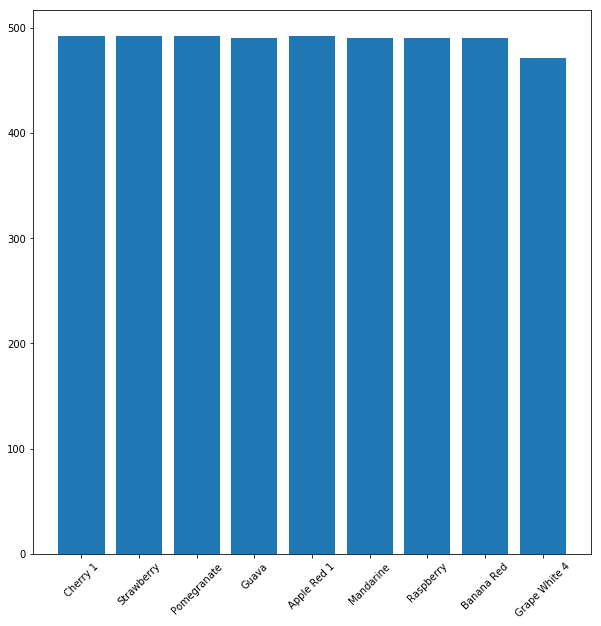

In [4]:
# Visualizing Fruit Frequencies of training data

plt.figure(figsize=(10,10))
plt.bar(CATEGORIES, n_categories)
plt.xticks(CATEGORIES, rotation=45)
plt.show()

In [5]:
%%time
# Preparing training data for CNN

random.shuffle(training_data)

X_train = []
Y_train = []
for img, class_num in training_data:
    X_train.append(img)
    Y_train.append(class_num)

X_train = np.array(X_train).reshape(-1, 224, 224, 3)
Y_train = np.array(Y_train)
X_train.shape

CPU times: user 842 ms, sys: 665 ms, total: 1.51 s
Wall time: 1.51 s


### Testing Data

In [6]:
# Loading Test data

testing_data = []
n_test_categories = []
test_path = '/Users/Amechi/Documents/Python Files/fruits/fruits-360/Test'
test_CATEGORIES = []

test_list = os.listdir(test_path)
test_list.remove('.DS_Store')

for filename in test_list:
    test_CATEGORIES.append(filename)      

def create_test_data():
    for category in test_CATEGORIES:
        folder_path = os.path.join(test_path, category).replace("\\","/")
        class_num = test_CATEGORIES.index(category)
        counter = 0
        for i in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, i).replace("\\","/")
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                testing_data.append([img, class_num])
                counter += 1
            except Exception as e:
                pass
        n_test_categories.append(counter)
create_test_data()


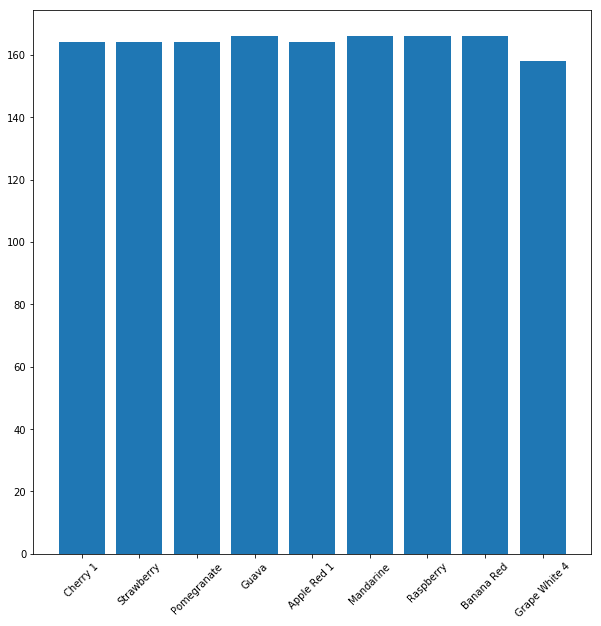

In [7]:
# Visualizing Fruit Frequencies of testing data

plt.figure(figsize=(10,10))
plt.bar(test_CATEGORIES, n_test_categories)
plt.xticks(test_CATEGORIES, rotation=45)
plt.show()

In [8]:
# Prepare test data

random.shuffle(testing_data)

X_test = []
Y_test = []
for img, class_num in testing_data:
    X_test.append(img)
    Y_test.append(class_num)

X_test = np.array(X_test).reshape(-1, 224, 224, 3)
X_test.shape

(1478, 224, 224, 3)

In [9]:
# Preparing Outcome Variables
Y_train = utils.to_categorical(Y_train, num_classes=len(n_categories))
Y_test = utils.to_categorical(Y_test, num_classes=len(n_test_categories))

# Normalizing Data
X_train_ = X_train/255
X_test_ = X_test/255

x_train,y_train = X_train_ , Y_train
x_val,y_val = X_test_ , Y_test


## Modeling the Data

### Control - 5 Epochs, Image Augmentation

In [10]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=5
batch_size=36

W0822 07:04:23.770716 4696458688 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 07:04:23.785487 4696458688 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 07:04:23.788295 4696458688 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 07:04:23.803390 4696458688 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0822 07:04:23.806653 4696458688 deprecation_wrapper.py:119] From /usr/loca

In [11]:
%%time

# Adding Variations of original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/5
122/122 [==============================] - 116s 953ms/step - loss: 0.3786 - acc: 0.8862 - val_loss: 0.3079 - val_acc: 0.8889
Epoch 2/5
122/122 [==============================] - 113s 923ms/step - loss: 0.2593 - acc: 0.8986 - val_loss: 0.1977 - val_acc: 0.9062
Epoch 3/5
122/122 [==============================] - 97s 798ms/step - loss: 0.1521 - acc: 0.9281 - val_loss: 0.1499 - val_acc: 0.9185
Epoch 4/5
122/122 [==============================] - 98s 802ms/step - loss: 0.1076 - acc: 0.9525 - val_loss: 0.0908 - val_acc: 0.9673
Epoch 5/5
122/122 [==============================] - 99s 814ms/step - loss: 0.0757 - acc: 0.9706 - val_loss: 0.1927 - val_acc: 0.9417
CPU times: user 36min 58s, sys: 7min 30s, total: 44min 29s
Wall time: 8min 50s


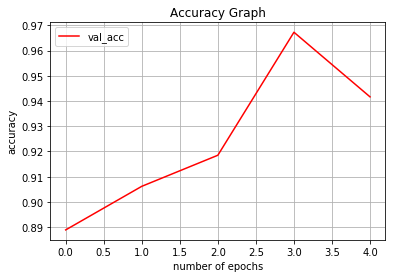

In [12]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy generally increased as the number of epochs increased.

### 10 Epochs, Image Augmentation

In [13]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=36

In [14]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
122/122 [==============================] - 108s 884ms/step - loss: 0.3933 - acc: 0.8912 - val_loss: 0.2487 - val_acc: 0.9014
Epoch 2/10
122/122 [==============================] - 100s 817ms/step - loss: 0.2314 - acc: 0.9018 - val_loss: 0.1774 - val_acc: 0.9166
Epoch 3/10
122/122 [==============================] - 101s 828ms/step - loss: 0.1835 - acc: 0.9153 - val_loss: 0.1422 - val_acc: 0.9311
Epoch 4/10
122/122 [==============================] - 116s 950ms/step - loss: 0.1303 - acc: 0.9417 - val_loss: 0.0608 - val_acc: 0.9726
Epoch 5/10
122/122 [==============================] - 116s 948ms/step - loss: 0.0886 - acc: 0.9632 - val_loss: 0.0543 - val_acc: 0.9758
Epoch 6/10
122/122 [==============================] - 128s 1s/step - loss: 0.0685 - acc: 0.9713 - val_loss: 0.0344 - val_acc: 0.9904
Epoch 7/10
122/122 [==============================] - 127s 1s/step - loss: 0.0721 - acc: 0.9721 - val_loss: 0.0464 - val_acc: 0.9819
Epoch 8/10
122/122 [==============================] - 

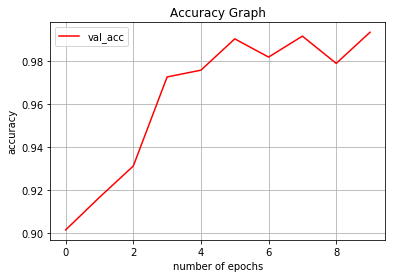

In [15]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy generally increased as the number of epochs increased. Increasing the max number of epochs resulted in a higher final accuracy and stabilized accuracy scores at higher epochs.

### 5 Epochs, Reduced Image Augmentation

In [16]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=5
batch_size=36

In [17]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.01,    
                           zoom_range=0.01,        
                           width_shift_range=0.01, 
                           height_shift_range=0.01,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/5
122/122 [==============================] - 104s 855ms/step - loss: 0.1544 - acc: 0.9481 - val_loss: 0.0590 - val_acc: 0.9769
Epoch 2/5
122/122 [==============================] - 130s 1s/step - loss: 0.0065 - acc: 0.9981 - val_loss: 0.0121 - val_acc: 0.9954
Epoch 3/5
122/122 [==============================] - 138s 1s/step - loss: 0.0074 - acc: 0.9978 - val_loss: 0.0235 - val_acc: 0.9919
Epoch 4/5
122/122 [==============================] - 114s 930ms/step - loss: 0.0038 - acc: 0.9987 - val_loss: 0.0294 - val_acc: 0.9947
Epoch 5/5
122/122 [==============================] - 106s 865ms/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0461 - val_acc: 0.9918
CPU times: user 41min 47s, sys: 8min 50s, total: 50min 37s
Wall time: 9min 56s


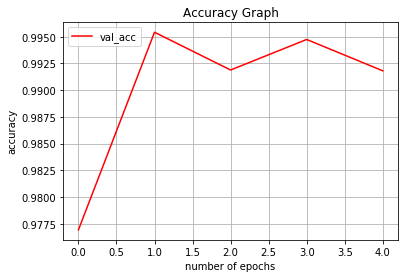

In [18]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Reducing the image augmentation actually resulted in higher accuracy scores. The increased risk of overfitting may become more evident with larger datasets. However, this model is the most preferable for classifying the fruit because of the extremely high accuracy.

### 5 Epochs, Image Augmentation, Reduced Convolution

In [19]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=5
batch_size=36

In [20]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/5
122/122 [==============================] - 154s 1s/step - loss: 0.5563 - acc: 0.8794 - val_loss: 0.3486 - val_acc: 0.8889
Epoch 2/5
122/122 [==============================] - 163s 1s/step - loss: 0.3394 - acc: 0.8886 - val_loss: 0.3137 - val_acc: 0.8889
Epoch 3/5
122/122 [==============================] - 181s 1s/step - loss: 0.3092 - acc: 0.8902 - val_loss: 0.2710 - val_acc: 0.9012
Epoch 4/5
122/122 [==============================] - 167s 1s/step - loss: 0.2631 - acc: 0.8985 - val_loss: 0.2344 - val_acc: 0.9087
Epoch 5/5
122/122 [==============================] - 176s 1s/step - loss: 0.2279 - acc: 0.9063 - val_loss: 0.2149 - val_acc: 0.9108
CPU times: user 1h 56s, sys: 21min 4s, total: 1h 22min 1s
Wall time: 14min 5s


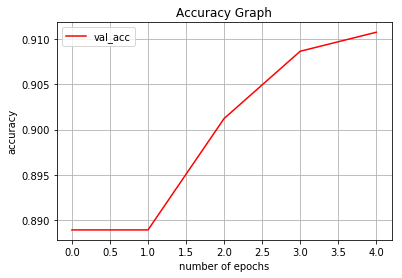

In [21]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Computational complexity increased runtimes significantly. Accuracy also took a notable drop.

### 5 Epochs, Image Augmentation, Increased Batch Size

In [22]:
## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=5
batch_size=72

In [23]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/5
61/61 [==============================] - 105s 2s/step - loss: 0.4123 - acc: 0.8831 - val_loss: 0.3235 - val_acc: 0.8889
Epoch 2/5
61/61 [==============================] - 94s 2s/step - loss: 0.2954 - acc: 0.8952 - val_loss: 0.2418 - val_acc: 0.8993
Epoch 3/5
61/61 [==============================] - 92s 2s/step - loss: 0.2056 - acc: 0.9125 - val_loss: 0.2028 - val_acc: 0.8856
Epoch 4/5
61/61 [==============================] - 107s 2s/step - loss: 0.1669 - acc: 0.9256 - val_loss: 0.1595 - val_acc: 0.9163
Epoch 5/5
61/61 [==============================] - 102s 2s/step - loss: 0.1389 - acc: 0.9387 - val_loss: 0.1469 - val_acc: 0.9302
CPU times: user 36min 7s, sys: 5min 56s, total: 42min 4s
Wall time: 8min 24s


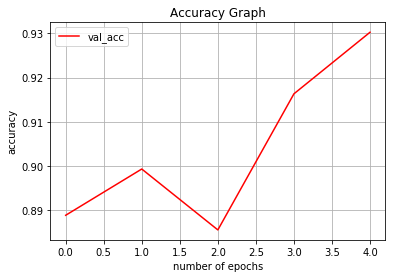

In [24]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Increasing the batch size significantly reduced runtime and computational complexity. There was a significant drop in accuracy, however.